<div style="text-align: right">INFO 6105 Data Sci Eng Methods and Tools, Lecture 13 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 27 November 2022, with material from Thomas Wiecki and Robert Kubler</div>

# 1. Some model-building roadblocks
### Presence of outliers
A common situation in which robust estimation is used occurs when the data contain **outliers**. In the presence of outliers that do not come from the same data-generating process as the rest of the data, least squares estimation is ***inefficient*** and can be biased. 

Because the least squares predictions are dragged towards the outliers, and because the variance of the estimates is artificially inflated, the result is that outliers can be masked. 

How to deal with outliers so they don't skew our model too much?

### Working with non-linear effects
One can deal with non-linear effects by squaring or taking powers of the independent variables. For example, if you suspect that $y \approx \alpha x + \beta x^2$, then just rename $x_2 = x^2$ as another variable, and we're back to a linear model (of two variables)!

However, it is an ***unrealistically strong assumption*** that every single value of $y$, after transformation using sone kernel function (`log()`, `sqrt()` etc.), will end up having a linear relationship with $X$. So, instead of $y$, we use...


# 2. Generalized Linear Models
**General Linear Regression models** is how we do data science when we think there is a **linear** relationship between, maybe not a dependent variable directly, but ***one of the statistical moments of*** a dependent variable (e.g. the mean), and other independent variable(s).

Here are the basics of linear models:

- Additive relationships: Classical Linear models assume that the regression variables should have an additive relationship with each other.

- Classical Linear models assume that the data should have *constant variance* i.e. the data should be [homoscedastic](https://en.wikipedia.org/wiki/Homoscedasticity). In real life, data is often *not* homoscedastic. The variance is not constant and sometimes it is a function of the mean. For e.g. the variance increases as the mean increases. This is common in financial datasets, for example. We also know that for some data likelihoods, the variance *should*, in fact, vrey with the mean (e.g. Poisson).

- Classical Linear models assume the errors of regression, also known as the residuals (the residual for each observation is the difference between predicted values of the dependent variable and observed values of the dependent variable), are normally distributed with mean zero. This condition is difficult to meet in real life.

- Non-correlated variables: Finally, the regression variables are assumed to be non-correlated with each other, and preferably independent of each other.

If your dataset is [heteroscedastic](https://en.wikipedia.org/wiki/Heteroscedasticity), if the residuals are not normally distributed, which is often the case in real world data sets, one needs to apply a suitable transformation (a.k.a a kernel method) to both $y$ and $X$ so as to make the relationship **linear** and at the same time stabilize the variance and normalize the errors.

<br />
<left>
<img src="ipynb.images/homoscedastic.png" width=600 />
</left>

The square root and the logarithm transformations are commonly used for achieving these effects:

Here's a non-linear (polynomial, or power) relationship:

$$ y = x_1^{\beta_1} * x_2^{\beta_2}* \cdots * x_n^{\beta_n}$$

Then do this:

$$ log(y) = \beta_1 log(x_1) + \beta_2 log(x_2) + \cdots + \beta_n log(x_n)$$

Make $log(x_i)$ the independent variable, and, voila, you have a linear relationship!

Suppose $y$ is a random variable that follows some kind of a probability distribution. So for any given combination of $X$ values in the data set, the real world is likely to present to you several random values of $y$ and only some of these possible values will appear in your training samples. In the real world, these values of $y$ will be randomly distributed around the conditional mean of $y$ given the specific value of $X$. The conditional mean of $y$ is denoted by $E(y|X)$.

<br />
<left>
<img src="ipynb.images/y-versus-x.png" width=600 />
</left>

In the variable transformation approach, we make the unrealistically strong assumption that every single value of $y$ i.e. each one of the blue dots in the above plot, after transformation using log(), sqrt() etc., will end up having a linear relationship with $X$. This is obviously too much to expect.

### A more realistic model
It is an ***unrealistically strong assumption*** that every single value of $y$, after transformation using `log()`, `sqrt()` etc., will end up having a linear relationship with $X$:

$$ y = \beta_1 log(x_1) + \beta_2 log(x_2) + \cdots + \beta_n log(x_n)$$

What seems more realistic is that the conditional mean (a.k.a. **expectation**) of $y$, i.e. $E(y|x)$, after a suitable transformation, ought to have a linear relationship with $X$.

The **conditional expectations** of $Y$ on $X = x_i$ is denoted by:

$$\pi_i = E(y|X=x_i)$$

Instead of transforming every single value of $y$ for each $x$, GLMs transform only the conditional expectation of $y$ for each $x$. So there is no need to assume that every single value of $y$ is expressible as a linear combination of regression variables.

$$ log(E(y|X=x_i)) = \beta_1 log(x_1) + \beta_2 log(x_2) + \cdots + \beta_n log(x_n)$$

The transformation function (the kernel method) is called the **link function** of the GLM and is denoted by $g()$. In the above example, the log() is the link function, i.e. $g() = log()$.

The link function $g()$ can take many forms and we get a different regression model based on what form $g()$ takes. Here are a few popular forms and the corresponding regression models that they lead to

### Some link functions
For a **linear** regression model:

$$g(\pi_i) = \pi_i$$

For a **logistic** (and binomial) regression model:

$$g(\pi_i) = \frac{\pi_i}{1 - \pi_i}$$

which means:

$$\pi_i = \frac{e^{\beta x_i}}{1 - e^{\beta x_i}}$$

For a Poisson model:

$$g(\pi_i) = ln(\pi_i)$$

which means:

$$\pi_i = e^{\beta x_i}$$

There are many other variants of $g()$ such as the Poisson-Gamma mixture leading to the Negative Binomial regression model and the inverse of the Cumulative Distribution Function of the Normal distribution, which leads to the probit model.

### Handling  heteroscedasticity
When your data data has variance which is is not constant or residual errors are non-normal, what to do?

GLMs account for the possibility of a non-constant variance by assuming that the variance is some function $V(µ)$ of the mean $µ$, or more accurately the conditional mean $µ|X=x$.

In each of the above mentioned models, we assume a suitable variance function $V(µ|X=x)$.

>In Generalized Linear Models, one expresses the variance in the data as a suitable function of the mean value.

In the Linear regression model, we assume $V(µ)$ = some constant, i.e. variance is constant. Why? Because Linear models assume that $y$ is Normally distributed and a Normal distribution has a constant variance.

In the Logistic and Binomial Regression models, we assume, $V(µ) = µ — µ²/n$ for a data set size of $n$ samples, as required by a Logit-distributed $y$ value.

In the Poisson Regression model, we assume $V(µ) = µ$. This is because, the Poisson regression model assumes that $y$ has a Poisson distribution and in a Poisson distribution, variance = mean.

In the Negative Binomial regression model, we assume $V(µ) = µ + α*µ²$, where $α$ is a dispersion parameter which allows us to deal with over-dispersed or under-dispersed data.

…and so on for other models.

In GLMs, it is possible to show that the model is not sensitive to the distributional form of the residual errors. In simple terms, the model doesn’t care whether the model’s errors are normally distributed or distributed any other way, as long as the mean-variance relationship that you assume, is actually satisfied by your data.

>Generalized Linear Models do not care if the residual errors are normally distributed or not as long as the specified mean-variance relationship is satisfied by the data.

This makes GLMs a practical choice for many real world data sets that are nonlinear and heteroscedastic and in which we cannot assume that the model’s errors will always be normally distributed.

Finally, a word of caution: Similar to Classical Linear Regression models, GLMs also assume that the regression variables are uncorrelated with each other. Therefore GLMs cannot be used to model time series data which typically contain a lot of auto-correlated observations.

>Generalized Linear Models should not be used for modeling auto-correlated time series data.

# 3. Simple Linear Regression in an imaginary World
Frequentist statistics have different tests for different scenarios (T test, chi-squared, etc.). 

In Bayesian land you define your model by an equation for the data likelihiid, equate its variables to pdfs, and simulate with an MCMC sampling algorithm like `PyMC3`'s Metroplois.

## Frequentist formulation
In general, frequentists think about Linear Regression as follows:

$$Y=βX+ϵ$$

where $Y$ is the output we want to predict (or dependent variable), $X$ is our predictor (or independent variable), and $β$ are the coefficients (or parameters) of the model we want to estimate. $ϵ$ is an error term which is usually assumed to be normally distributed.

We can then use Ordinary Least Squares (OLS) or Maximum Likelihood (MLE) to find the best fitting $β$.

## Bayesian reformulation
Bayesians take a probabilistic view of the world and express this model in terms of probability distributions. Our above linear regression can be rewritten:

$Y∼N(Xβ,σ^2)$

In words, we view $Y$ as a random variable (or random vector) of which each element (data point) is distributed according to a **Normal distribution**. 

The mean of this normal distribution is provided by our linear predictor, with variance $σ^2$.

There are two critical advantages of Bayesian estimation:

- **Priors**: We can quantify any prior knowledge we might have by placing priors on the parameters. For example, if we think that $σ$ is likely to be small we would choose a prior with more probability mass on low values.
- **Quantifying uncertainty**: We do not get a single estimate of $β$ as above but instead a complete **posterior distribution** about how likely different values of $β$ are. For example, with few data points our uncertainty in $β$ will be very high and we'd be getting very wide posteriors.

In [1]:
%matplotlib inline
from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Generating data
Let's create some toy data to play around with and scatter-plot it.

We create a regression line defined by intercept and slope, and add data points with noise sampled from a Normal with the mean set to the regression line.

In [2]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x

# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

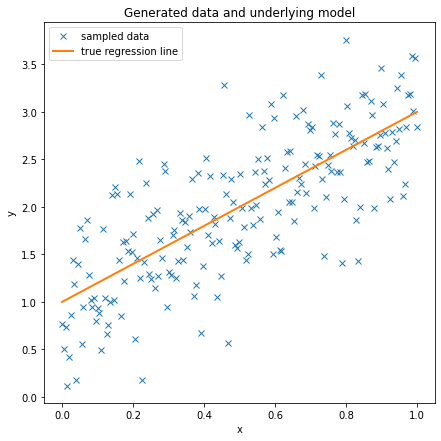

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

## Bayesian simulation
Lets fit a Bayesian linear regression model to this data.

The [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution) and [Half-Cauchy distribution](https://distribution-explorer.github.io/continuous/halfcauchy.html) are often used as a prior model for the noise.

We haven't used these before, so they're new disributions for us!

>I found a really neat [distribution explorer](https://distribution-explorer.github.io) that shows you all the important model-building distributions for dataset histograms.

The [Half-Cauchy distribution](https://distribution-explorer.github.io/continuous/halfcauchy.html) is a Cauchy distribution truncated to only have nonzero probability density for values greater than or equal to the location of the peak.

In [7]:
#Hamiltonian Monte Carlo
#weaking the model 

In [4]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sd=20)
    x_coeff = Normal('x', 0, sd=20)
    
    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x, 
                        sd=sigma, observed=y)
    
    # Inference!
    trace = sample(progressbar=True) # draw posterior samples using NUTS sampling

C:\Users\HP\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\HP\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 728 seconds.


However, `PyMC3` has a more Dua Lipa formulation that I introduced you to last week. Here it is:

In [6]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and 
    # and all its parameters are automatically added to our model.
    GLM.from_formula('y ~ x', data)
    trace = sample(progressbar=True, tune=1000, cores=4) # draw posterior samples using NUTS sampling

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\HP\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\HP\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 623 seconds.


Much shorter, but this code does the exact same thing as the above model specification (you can change priors and everything else too if you wanted, I show you later how to). 

`glm()` parses the Patsy model string, adds random variables for each regressor (Intercept and slope x in this case), adds a likelihood (by default, a Normal is chosen), and all other variables (sigma). 

Finally, `glm()` initializes the parameters to a good starting point by estimating a frequentist linear model using statsmodels.

**Patsy syntax**, `y ~ x` specifies that we have an output variable y that we want to estimate as a linear function of x.

## Model analysis
Bayesian inference does not give us only one best fitting line (as maximum likelihood does) but rather a whole posterior distribution of likely parameters. Lets plot the posterior distribution of our parameters and the individual samples we drew.

In [ ]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();

The left side shows our **marginal posterior** -- for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.

There are a couple of things to see here. The first is that our sampling chains for the individual parameters (left side) seem well converged and stationary (there are no large drifts or other odd patterns). We see 4 lines because we ran 4 chains in parallel (`cores` parameter above). They all seem to provide the same answer which is re-assuring.

Secondly, the maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters used to generate the data (x is the regression coefficient and sigma is the standard deviation of our normal).

In the GLM we thus do not only have one best fitting regression line, but many. A posterior predictive plot takes multiple samples from the posterior (intercepts and slopes) and plots a regression line for each of them. Here we are using the `glm.plot_posterior_predictive()` convenience function for this.

In [ ]:
plt.plot(x, y, 'x', label='data')
plots.plot_posterior_predictive_glm(trace, samples=100, 
                                    label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

As you can see, our estimated regression lines are very similar to the true regression line. But since we only have limited data we have uncertainty in our estimates, here expressed by the variability of the lines.

# 4. The real World has outliers
The problem with simulated data though is that it's ***simulated***. In the real world things tend to get more messy and assumptions like normality are easily violated by a few **outliers**.

Lets see what happens if we add some outliers to our simulated data.

In [ ]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x

# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

# Add outliers
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x_out, y_out, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

Lets see what happens if we estimate our Bayesian linear regression model using the `glm()` function as before. This function takes a Patsy string to describe the linear model and adds a Normal likelihood by default.

In [ ]:
with Model() as model:
    GLM.from_formula('y ~ x', data)
    trace = sample(progressbar=True, tune=1000)

Let's plot the posterior predictive regression lines by taking regression parameters from the posterior distribution and plotting a regression line for each.

In [ ]:
plt.subplot(111, xlabel='x', ylabel='y', 
            title='Posterior predictive regression lines')
plt.plot(x_out, y_out, 'x', label='data')

# plots is a PyMC3 package
plots.plot_posterior_predictive_glm(trace, samples=100, 
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line, 
         label='true regression line', lw=3., c='y')

plt.legend(loc=0);

The fit is quite skewed and we have a fair amount of uncertainty in our estimate as indicated by the wide range of different posterior predictive regression lines. 

Why is this? The reason is that the normal distribution ***does not have a lot of mass in the tails*** and consequently is unfit to model data with a lot (or a few very distant) outliers.

Since the problem is the light tails of the Normal distribution, we can instead assume that our data is not normally distributed but instead distributed according to the **Student-T** distribution which has heavier tails.

With `theano`:

In [ ]:
from pymc3 import Normal, StudentT
normal_dist = Normal.dist(mu=0, sd=1)
t_dist = StudentT.dist(mu=0, lam=1, nu=1)

import theano
x_eval = np.linspace(-8, 8, 300)
plt.plot(x_eval, theano.tensor.exp(normal_dist.logp(x_eval)).eval(), label='Normal', lw=2.)
plt.plot(x_eval, theano.tensor.exp(t_dist.logp(x_eval)).eval(), label='Student T', lw=2.)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend();

With `pm.math`:

In [ ]:
from pymc3 import Normal, StudentT
normal_dist = Normal.dist(mu=0, sd=1)
t_dist = StudentT.dist(mu=0, lam=1, nu=1)

x_eval = np.linspace(-8, 8, 300)
plt.plot(x_eval, pm.math.exp(normal_dist.logp(x_eval)).eval(), label='Normal', lw=2.)
plt.plot(x_eval, pm.math.exp(t_dist.logp(x_eval)).eval(), label='Student T', lw=2.)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend();

To define the usage of a Student-T distribution in PyMC3 (to specify that our data is Student T-distributed), we do the following.

The Student-T distribution has, besides the mean and variance, a third parameter called **degrees of freedom** that describes how much mass should be put into the tails. Here it is set to 1 which gives maximum mass to the tails (setting this to infinity results in a Normal distribution!). One could also place a prior on this rather than fixing it.

See `glm.families` for more choices.

In [ ]:
with Model() as model_robust:
    family = glm.families.StudentT()
    GLM.from_formula('y ~ x', data, family=family)
    trace_robust = sample(progressbar=True, tune=1000)

Let's plot.

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(x_out, y_out, 'x')

plots.plot_posterior_predictive_glm(trace_robust, label='posterior predictive regression lines')
plt.plot(x, true_regression_line, 
         label='true regression line', lw=3., c='y')
plt.legend();

And now we see that the outliers are barely influencing our estimation at all because our likelihood function assumes that outliers are much more probable than under the Normal distribution.

# 5. Hierarchical Linear regression
Gelman et al.'s (2007) radon dataset is a classic dataset in data science. 

In this dataset the amount of the radioactive gas radon has been measured among different households in all county's of several states. Radon gas is known to be the highest cause of lung cancer in non-smokers. It is believed to enter the house through the basement. Moreover, its concentration is thought to differ regionally due to different types of soil.

Let's investigate this difference and  make predictions of radon levels in different counties, *and also where in the house radon was measured*. 

Let's look at the state Minnesota, a state that contains 85 countiess in which different measurements are taken, ranging from 2 till 80 measurements per county.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd

data = pd.read_csv('data/radon.csv')

county_names = data.county.unique()
county_idx = data['county_code'].values

In [9]:
data[['county', 'log_radon', 'floor']].head(10)

,county,log_radon,floor
0,AITKIN,0.832909,1.0
1,AITKIN,0.832909,0.0
2,AITKIN,1.098612,0.0
3,AITKIN,0.095310,0.0
4,ANOKA,1.163151,0.0
5,ANOKA,0.955511,0.0
6,ANOKA,0.470004,0.0
7,ANOKA,0.095310,0.0
8,ANOKA,-0.223144,0.0
9,ANOKA,0.262364,0.0


In [10]:
data[['county', 'log_radon', 'floor']].tail(10)

,county,log_radon,floor
909,WRIGHT,1.648659,0.0
910,WRIGHT,0.832909,0.0
911,WRIGHT,0.875469,1.0
912,WRIGHT,2.772589,0.0
913,WRIGHT,2.261763,0.0
914,WRIGHT,1.871802,0.0
915,WRIGHT,1.526056,0.0
916,WRIGHT,1.629241,0.0
917,YELLOW MEDICINE,1.335001,0.0
918,YELLOW MEDICINE,1.098612,0.0


In a past notebook, we drew the histogram of the data so we could match it to a well-known statistical function.

Seaborn's `distplot` computes the histogram *and also fits it to a curve*. See [here](https://seaborn.pydata.org/generated/seaborn.distplot.html) for the API.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_radon', ylabel='Density'>

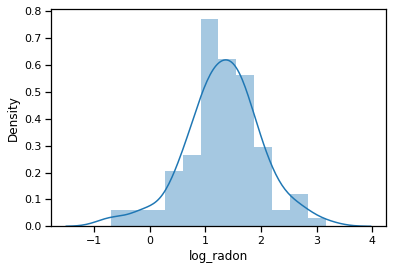

In [11]:
import seaborn as sns
sns.set_context('notebook')

hennepin_radon = data.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

Recall that we picked a **Normal distribution**, which is described by its two paramaters $\mu$ (mean) and $\sigma$ (standard deviation):

$$y_i \sim N(\mu, \sigma^2)$$

Note that **Normal** and **Gaussian** is the same thing because Gaussian distributions are the most *normal*!

This implies that we have 2 unknowns in the model; the **mean** and **standard deviation** of the distribution.

While there may likely be prior information about the distribution of radon values, we will assume ***no prior knowledge*** (about the priors), and specify a **diffuse** prior for each parameter.

Since the mean can take any real value (since it is on the log scale), we will use ***another normal distribution*** here, and specify a *large* variance to allow the possibility of very large or very small values:

$$\mu \sim N(0, 10^2)$$

For the standard deviation, we know that the true value must be positive (no negative variances!). Let's choose a [**uniform**](http://mathworld.wolfram.com/UniformDistribution.html) pdf prior, bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation (on the log scale) could take. That way, we are sure to capture the real value, somewhere in -between.

$$\sigma \sim U(0, 10)$$

We name our model and define our priors as the pdf's we mentionned above.

In [12]:
from pymc3 import Model, Normal, Uniform

with Model() as radon_model:
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

All that remains is to add the **likelihood**, which takes $\mu$ and $\sigma$ as parameters, and the log-radon values as the set of observations:

In [13]:
with radon_model:    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

Now, we will fit the model using a numerical approach called [**variational inference**](https://www.cs.jhu.edu/~jason/tutorials/variational.html), which is the default algorithm for PyMC3 (it is a more modern version of the Metropolis algorithm).

In [14]:
from pymc3 import fit

with radon_model:

    samples = fit().sample(1000)

Finished [100%]: Average Loss = 134.68


Now we're ready to plot our posterior, which is the best possible values for $\mu$ and $\sigma$ that PyMC3 evaluated for us. In other words, the values of $\mu$ and $\sigma$ that result in the best possible $N(\mu, \sigma^2)$.

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\HP\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


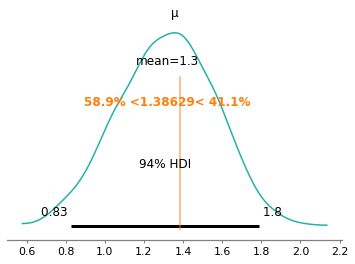

In [17]:
from pymc3 import plot_posterior

plot_posterior(samples, var_names=['μ'], ref_val=np.log(4), color='LightSeaGreen');

The plot shows the posterior distribution of $\mu$, along with an estimate of the 95% posterior **credible interval**. 

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\HP\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


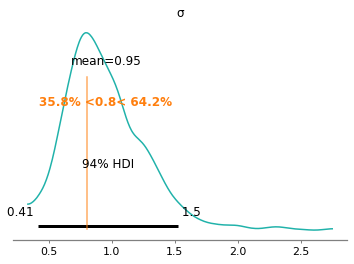

In [19]:
plot_posterior(samples, var_names=['σ'], ref_val=0.8, color='LightSeaGreen');

### Prediction

What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the **posterior predictive distribution**, in its continuous formulation:

$$p(z \;| \; y) = \int_{\theta} p(z \;| \; \theta) p(\theta \; | \; y) d\theta$$

where here $z$ is the predicted value and y is the data used to fit the model.

The posterior predictive distribution accounts for uncertainty about $\theta$. We should refrain from plugging in a single best estimate $\hat{\theta}$ for $\theta$, because it ignores uncertainty about $\theta$, and because a source of uncertainty is ignored, the predicted distribution will be too narrow (extreme values of $\tilde {x}$ will occur more often than the posterior distribution suggests).

The posterior distribution of possible $\theta$ values depends on $\mathbf {X}$: $p(\theta \; | \; \mathbf {X} )$. And the posterior predictive distribution of $\tilde {x}$ given $\mathbf {X}$ is calculated by marginalizing the distribution of $\tilde {x}$ given $\theta$ over the posterior distribution of $\theta$ given $ \mathbf {X}$. That is the integral above. See [here](https://en.wikipedia.org/wiki/Posterior_predictive_distribution) for more explanation.

We can estimate the probability that a given household has a log-radon measurement larger than one from the posterior samples of the parameters in the model:

In [20]:
mus = samples['μ']
sigmas = samples['σ']

In [21]:
radon_samples = Normal.dist(mus, sigmas).random()

In [22]:
(radon_samples > np.log(4)).mean()

0.469

The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is 0.44.

So that's good to know. But we did not do any **regressions** in the sense that we did not estimate our dependent variable as a function of an independent variable.

So, let's do a regression now.

### Radon regression

We have multiple radon measurements (log-converted to be on the real line) in a county, and also whether the measurement has been taken in the basement (floor == 0) or on the first floor (floor == 1). 

Let's test the prediction that radon concentrations are higher in the basement by building a **linear model** where the radon concentration is a linear function of the floor of the house.

We know that radon, a dangerous poisonous gas, seeps into a house from its foundation, so it makes sense that the basement has higher concentrations than the first floor, but let's *test this hypothesis*.

## Option A: Pooling all measurements
Let's pool all our data and estimate one linear regression to asses the influence of measurement across all counties:

$$\text{radon}_{i,c} = α + β∗\text{floor}_{i,c} + ϵ$$

Where $i$ represents the measurement, $c$ the county and $\text{floor}$ contains which floor the measurement was made. 

Critically, we are only estimating ***one*** intercept and ***one*** slope for all measurements over all counties.

## Option B: Separate statistics per county
But what if we are interested whether different counties actually have different relationships (slope) and different base-rates of radon (intercept)? Then we have

$$\text{radon}_{i,c} = α_c + β_c∗\text{floor}_{i,c} + ϵ_c$$

Note that we added the index $c$ on the slopes and intercepts so we are estimating $n$ different $α$s and $β$s, one for each county.

>**Note**: We also added a $c$ index on the error, allowing us to handle heteroscedastic data (data in which the variance is not constant across counties), but we could also handle heteroscedasticity within counties by assuming that the
error is some function ϵ(µ) of the mean µ, or more accurately the conditional mean µ|X=x.

Let's estimate this model. For each county a new estimate of the parameters is initiated. As we have no prior information on what the intercept or regressions could be, we are going to place a Normal distribution centered around 0 with a *wide* standard-deviation. We'll assume the measurements are **normally distributed** with noise $ϵ$ on which we place a Half-Cauchy distribution.

In [ ]:
indiv_traces = {}
for county_name in county_names:
    # Select subset of data belonging to county
    c_data = data.loc[data.county == county_name]
    c_data = c_data.reset_index(drop=True)
    
    c_log_radon = c_data.log_radon
    c_floor_measure = c_data.floor.values
    
    with pm.Model() as individual_model:
        # Intercept prior
        a = pm.Normal('alpha', mu=0, sigma=1)
        
        # Slope prior
        b = pm.Normal('beta', mu=0, sigma=1)
    
        # Model error prior
        eps = pm.HalfCauchy('eps', beta=1)
    
        # Linear model
        radon_est = a + b * c_floor_measure
    
        # Data likelihood
        y_like = pm.Normal('y_like', mu=radon_est, sigma=eps, observed=c_log_radon)

        # Inference button (TM)!
        trace = pm.sample(progressbar=True, cores=1)
        
    indiv_traces[county_name] = trace

## Hierarchical regression
There is a middle ground to both of these extreme views. Specifically, we may assume that while $α$s and $β$s are *different* for each county, the coefficients all come ***from a common group distribution***:

$$α_c ∼ N(μ_α, σ^2_α)\\
β_c ∼ N(μ_β, σ^2_β)$$

This makes sense from a physics perspective because after all, all counties are in Minnesota and all radon gas deposits in Minnesota probably follow similar statistics.

We thus assume the intercepts $α$ and slopes $β$ to originate from a normal distribution centered around their respective **group mean** $μ$ with a certain standard deviation $σ^2$, the values (or rather posteriors) of which we also estimate. 

That's why this is called **multilevel** or **hierarchical** modeling.

In [ ]:
with pm.Model() as hierarchical_model:
    # Hyperpriors
    mu_a = pm.Normal('mu_alpha', mu=0., sigma=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=1)
    mu_b = pm.Normal('mu_beta', mu=0., sigma=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta=1)
    
    # Intercept for each county, distributed around group mean mu_a
    a = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, shape=len(data.county.unique()))
    
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('beta', mu=mu_b, sigma=sigma_b, shape=len(data.county.unique()))
    
    # Model error
    eps = pm.HalfCauchy('eps', beta=1)
    
    # Expected value
    radon_est = a[county_idx] + b[county_idx] * data.floor.values
    
    # Data likelihood
    y_like = pm.Normal('y_like', mu=radon_est, sigma=eps, observed=data.log_radon)

In [ ]:
with hierarchical_model:
    hierarchical_trace = pm.sample()

In [ ]:
pm.traceplot(hierarchical_trace);

The marginal posteriors in the left column are highly informative. `mu_alpha` tells us the group mean (log) radon levels. `mu_beta` tells us that the slope is significantly negative (no mass above zero), meaning that radon concentrations are higher in the basement than first floor. We can also see by looking at the marginals for `alpha` that there is quite some differences in radon levels between counties. The different widths are related to how much measurements we have per county, the more, the higher our confidence in that parameter estimate.

Let's plot some examples of county's showing the true radon values, the hierarchial predictions and the non-hierarchical predictions.

The data points will be in black for three selected counties: CASS, CROW WING, and FREEBORN. The thick blue lines represent the mean estimate of the regression line of the individual model and the thick green lines represent the mean estimate of the regression line of the hierarchical model. 

The thinner lines are regression lines of individual samples from the posterior and give us a sense of how variable the estimates are.

In [ ]:
selection = ['CASS', 'CROW WING', 'FREEBORN']
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = data.loc[data.county == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['county_code'])[0]

    xvals = np.linspace(-0.2, 1.2)
    for a_val, b_val in zip(indiv_traces[c]['alpha'][::10], indiv_traces[c]['beta'][::10]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.05)
    axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 
                 'b', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.05)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data.floor + np.random.randn(len(c_data))*0.01, c_data.log_radon, 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0,1])
    axis[i].set_xticklabels(['basement', 'first floor'])
    axis[i].set_ylim(-1, 4)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('log radon level')

When looking at the county CASS we see that the non-hierarchical estimation has huge uncertainty about the radon levels of first floor measurements -- that's because we don't have any measurements in this county. The hierarchical model, however, is able to apply what it learned about the relationship between floor and radon-levels from *other counties* to CASS and make sensible predictions even in the absence of measurements.

We can also see how the hierarchical model produces more robust estimates in CROW WING and FREEBORN. In this regime of few data points the non-hierarchical model reacts more strongly to individual data points because that's all it has to go on.

Having the group-distribution constrain the coefficients we get meaningful estimates in all cases as we apply what we learn from the group to the individuals and vice-versa.

## Conclusion
A multi-level hierarchical Bayesian model gives the best of both worlds when we have multiple sets of measurements we expect to have similarity. 

The naive approach either pools all data together and ignores the individual differences, or treats each set as completely separate leading to noisy estimates as shown above. 

By placing a group distribution on the individual sets we can learn about each set and the group simultaneously. 

# 6. Verifying the model with out-of-sample predictions
Let's see how we can verify a GLM model.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

import arviz as az
import patsy
import pymc3 as pm

from pymc3 import glm

plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.dpi"] = 100

## 6.1 Dataset \#1
Bayesian linear regression is a more informative version of standard linear regression. Linear regression gives you *point values* for model parameters as well as predictions. Bayesian linear regression, in turn, gives you *probability distributions*.

<br />
<left>
<img src="ipynb.images/linear-regr-vs-bayesian.webp" width=600 />
</left>

Let's generate a dataset:

In [ ]:
x = [
   -1.64934805,  0.52925273,  1.10100092,  0.38566793, -1.56768245,
    1.26195686,  0.92613986, -0.23942803,  0.33933045,  1.14390657,
    0.65466195, -1.36229805, -0.32393554, -0.23258941,  0.17688024,
    1.60774334, -0.22801156,  1.53008133, -1.31431042, -0.27699609
] # inputs
y = [
   -3.67385666,  3.37543275,  6.25390538,  1.41569973, -2.08413872,
    6.71560158,  6.32344159,  2.40651236,  4.54217349,  6.25778739,
    4.98933806, -2.69713137,  1.45705571, -0.49772953,  1.50502898,
    7.27228263,  1.6267433 ,  6.43580518, -0.50291509,  0.65674682
] # outputs

In [ ]:
plt.scatter(x, y)

### Classical statistics
To build a regression model with sklearn's `LinearRegression`:

In [ ]:
X = np.array(x).reshape(-1, 1)
X.shape

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

Hence the model is $y = 3.2x + 2.19$.

In [ ]:
# Create a list of values in the best fit line
abline_values = [reg.coef_ * i + reg.intercept_ for i in np.linspace(-1.5, 1.5, 10)]

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y)
#ax.axline((0, reg.intercept_), slope=reg.coef_, color='C0', label='by slope')
plt.plot(np.linspace(-1.5, 1.5, 10), abline_values, 'b')

We can apply statistical hypothesis testing and check the p-value for the slope and determine if this apparent positive connection between x and y is significant. The t-statistic is around 13.8, the p-value is around 0.0 and a 95% confidence interval is [2.7, 3.7]. In short, this means that x has a significant positive influence on y.

The standard linear regression model outputs a single y value for each input x. Do you want to know the prediction for x = 0? Well, it is y = 2.19, take it or leave it.

There are ways to address this data insecurity not only for linear regression but for any regression algorithm via bootstrapping. In short: Subsample your data, fit a model on a subsample and use it to make a prediction. Repeat this 1000 times and you obtain 1000 different predictions.

You can compute the mean $μ$, the standard deviation $σ$, quantiles, or anything you want of these 1000 samples. If you still want to output a single number, just take the mean. However, now you also have the choice of outputting intervals, such as $[μ-3σ, μ+3σ]$.

This approach might work well, but it’s extremely computationally expensive since we have to fit a model 1000 times.

### Bayesian statistics
In Bayesian statistics, we deal with distribution. This makes it necessary to specify linear regression as a distribution as well. One assumption commonly used for the standard linear regression approach is the following: $y$ is normally distributed with mean $ax+b$ (the quantity we always predict) and some standard deviation $σ$:

$$y \approx N(ax+b, \sigma)$$

in other words, our data likelihood is a gaussian distribution with parameters $\mu$ (or, equivalently, as $a$ and $b$) and $\sigma$, where $\mu$ is modelled as an additive linear model.

In Bayesian statistics, we don’t treat ($\mu$, or) $a$ and $b$ as fixed variables, but also as coming from distributions.

If we say $a, b \approx N(0, 16)$, we tell the model that without observingany data, we expect the slope and intercept of the line to be around zero with a standard deviation of four, i.e. we expect a and b to be around -12 and 12. 

The prior is something we have to play around with if things don’t work out. This means that PyMC3 does not give a proper result, or the prediction performance of the model is bad.

How about $\sigma$? We could give it the same normal distributions as $a$ and $b$. What we do instead is model $σ²$ directly because we never need $σ$ directly, but only $σ²$ for the variance of $y$. Since $σ²$ is a positive number, we choose a prior distribution that yields exclusively positive values as well, such as the Exponential distribution, the Gamma distribution, or the Half-normal distribution.

The density of the exponential distribution is always decreasing. Using this distribution as a prior tells the model that we expect a small, but also positive value for $σ²$.

In [ ]:
import pymc3 as pm
import arviz as az

with pm.Model() as model:
    # define priors
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    # predictions
    obs = pm.Normal('observation', a*x + b, s, observed=y)
    
    # use MCMC to sample
    trace = pm.sample()
    
az.plot_posterior(trace)

We can see that the model comes to the same conclusion as the standard linear regression: A slope of around 3.2 and an intercept of around 2.2. We even see that the standard error is about 1.1. But here, we also get credible intervals for free!

Looking at these figures, it seems like the model is *still unsure about the parameters*: Look at the slope, for example. With a probability of 94%, the slope $a$ is between 2.7 and 3.7, which is still a rather wide interval. The same goes for the other parameters we estimated.

>The great thing about Bayesian reasoning: All of these distributions narrow down further, i.e. the model gets more certain the more data we provide

### Generating predictions
What we need to do is to generate a variable that is a container and can be changed:

In [ ]:
with pm.Model() as predictive_model:
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    x_ = pm.Data('features', x) # a data container, can be changed
    
    obs = pm.Normal('observation', a*x_ + b, s, observed=y)
    
    trace = pm.sample()

We basically told the model to use a placeholder x_ which was initially filled with our training data x. 

We then train the model, i.e. get posterior distributions for all of the parameters. 

We can now pass the model new data via:

In [ ]:
x_new = np.linspace(-3, 3, 50) # 50 input values between -3 and 3

with predictive_model:
    pm.set_data({'features': x_new})
    posterior = pm.sample_posterior_predictive(trace)

`posterior` is a dictionary that contains the new observations. Let’s grab them and store them as `y_pred`:

In [ ]:
posterior

In [ ]:
y_pred = posterior['observation']
y_pred.shape

The variable y_pred is a numpy array containing 2000 observations for each of the 50 inputs in x_new , hence its dimensions are 2000 x 50. 

For example, `y_pred[:, 0]` gives us 50 predictions, one for each entry in `x_new`, while `y_pred[0, :]` gives us 4000 predictions for the first element in `x_new`, namely -3.

Using this table, we can get the mean and the standard deviation across the 4000 samples for each of the 50 new inputs and visualize the result.

In [ ]:
y_mean = y_pred.mean(axis=0)
y_std = y_pred.std(axis=0)

plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='k', zorder=10, label='Data')
plt.plot(x_new, y_mean, label='Prediction Mean')
plt.fill_between(x_new, y_mean - 3*y_std, y_mean + 3*y_std, alpha=0.33, label='Uncertainty Interval ($\mu\pm3\sigma$)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-14, 16)
plt.legend(loc='upper left')

With the GLM Submodule, we rewrite our first simple model as:

In [ ]:
with pm.Model() as simpler_model:
    pm.glm.GLM.from_formula('y ~ x', dict(x=x, y=y))
    
    trace = pm.sample()

And if you want to change the default priors?

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})

my_priors = {
    'Intercept': pm.Cauchy.dist(0, 10),
    'x': pm.Cauchy.dist(0, 10)
}

with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', df, priors=my_priors)
    
    trace = pm.sample()

You can add as many variables as you wish as long as your machine can handle them:
```
a = pm.Normal('slopes', 0, 16, shape=3)
```

You can use different distributions than the normal distribution for y, for example, the Student’s t-distribution or the Cauchy distribution.

The tails of these two distributions are wider than the ones of the normal distribution. This has the effect that outliers don’t surprise, and hence influence the model as much as in the case of the normal distribution.

If you don’t want to predict continuous values at all but counts instead. In this case, use the Poisson, binomial, or negative binomial distributions:

In [ ]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y~x', df, family=pm.families.Poisson())
    
    trace = pm.sample()

## 6.2 Dataset \#2
For a more complex model, we will fit a **logistic regression model** where there is principally a multiplicative interaction between two numerical features. In fact, this model blows up on my laptop with the classical `Bad Initial Energy` error that underscores a bad fit. But I am curious if it works on yours!

We will use GLM's [patsy](https://patsy.readthedocs.io/en/latest/) formulas to make things simpler.

First, let's generate our dataset:

In [ ]:
import numpy as np
import pandas as pd

SEED = 47
np.random.seed(SEED)

# Number of data points
n = 250

# Create features
x1 = np.random.normal(loc=0.0, scale=2.0, size=n)
x2 = np.random.normal(loc=0.0, scale=2.0, size=n)
epsilon = np.random.normal(loc=0.0, scale=0.5, size=n)

# Define target variable
intercept = -0.5
beta_x1 = 1
beta_x2 = -1
beta_interaction = 2
z = intercept + beta_x1 * x1 + beta_x2 * x2 + beta_interaction * x1 * x2
p = 1 / (1 + np.exp(-z))
y = np.random.binomial(n=1, p=p, size=n)

# Build our dataframe
df = pd.DataFrame(dict(x1=x1, x2=x2, y=y))

df.head()

Let's explore our dataset:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.dpi"] = 100

sns.pairplot(
    data=df, kind="scatter", height=2, plot_kws={"color": sns_c[1]}, diag_kws={"color": sns_c[2]}
);

We conclude that:

- $x_1$ and $x_2$ are not correlated.

- $x_1$ and $x_2$ do not seem to separate the $y$-classes independently.

- The distribution of $y$ is not highly unbalanced.

In [ ]:
fig, ax = plt.subplots()
sns_c_div = sns.diverging_palette(240, 10, n=2)
sns.scatterplot(x="x1", y="x2", data=df, hue="y", palette=[sns_c_div[0], sns_c_div[-1]])
ax.legend(title="y", loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Sample Data", xlim=(-9, 9), ylim=(-9, 9));

Let's create features from a formula using [patsy](https://patsy.readthedocs.io/en/latest/) (also [here](https://learn-scikit.oneoffcoder.com/patsy.html)) directly and then use class `pymc3.glm.linear.GLM`. 

Let's start with a formula based on just the interaction effect between $x_1$ and $x_2$, since it's the strongest effect in the data we generated.

In [ ]:
import patsy

# Define model formula
formula = "y ~ x1 * x2"

# Create features
y, x = patsy.dmatrices(formula_like=formula, data=df)
y = np.asarray(y).flatten()
labels = x.design_info.column_names
x = np.asarray(x)

In [ ]:
labels

Let's do a train-test split in order to safegaurd part of the data for the purpose of testing:

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=SEED)

Let's define and fit the model and, why not, modify the default priors:

In [ ]:
import arviz as az
import pymc3 as pm
from pymc3 import glm

with pm.Model() as model:
    # Set data container
    data = pm.Data("data", x_train)
    
    # Define GLM family
    family = pm.glm.families.Binomial()
    
    # Set user-defined priors
    priors = {
        "Intercept": pm.Normal.dist(mu=0, sd=10),
        "x1": pm.Normal.dist(mu=0, sd=10),
        "x2": pm.Normal.dist(mu=0, sd=10),
        "x1:x2": pm.Normal.dist(mu=0, sd=10),
    }
    
    # Specify model
    glm.GLM(y=y_train, x=data, family=family, intercept=False, labels=labels, priors=priors)
    
    # Configure and run sampler
    trace = pm.sample(5000, chains=5, tune=1000, target_accept=0.87, random_seed=SEED)

In [ ]:
# Plot chains
az.plot_trace(data=trace)

In [ ]:
az.summary(trace)

Now, let's generate predictions (what are called **out-of-sample** predictions or [posterior predictive checks](https://pymc3-testing.readthedocs.io/en/rtd-docs/notebooks/posterior_predictive.html)) in order to verify our model.

In [ ]:
# Update data reference
pm.set_data({"data": x_test}, model=model)

# Generate posterior samples
ppc_test = pm.sample_posterior_predictive(trace, model=model, samples=1000)

In [ ]:
ppc_test

Let's compute the point prediction by taking the mean and defining the category via a threshold:

In [ ]:
p_test_pred = ppc_test["y"].mean(axis=0)
y_test_pred = (p_test_pred >= 0.5).astype("int")

Let's compute accuracy on the test set since we have the label for it!

In [ ]:
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_true=y_test, y_pred=y_test_pred): 0.3f}")

85% accuracy. Not bad.

We can also plot the [Receiver operating characteristic curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (ROC) and the [Area Under the Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) (AUC).

A ROC curve, first developed by electrical engineers and radar engineers during World War II for detecting enemy objects in battlefields, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

The **true-positive** (TP) rate is also known as sensitivity, recall or probability of detection.

The **false-positive** (FP) rate is also known as probability of false alarm.

In statistical hypothesis testing, a [type I error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Type_I_error) is the mistaken rejection of an actually true null hypothesis (also known as a **false positive** finding or conclusion; example: *an innocent person is convicted*), while a [type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Type_I_error) is the failure to reject a null hypothesis that is actually false (also known as a **false negative**, or **oopsie** finding or conclusion; example: *a guilty person is not convicted*).

In a two-class prediction problem (binary classification), the outcomes are labeled either as positive (p) or negative (n). There are four possible outcomes from a binary classifier: If the outcome from a prediction is p and the actual value is also p, then it is called a **true positive** (TP); however if the actual value is n then it is said to be a **false positive** (FP or *false alarm*). Conversely, a true negative (TN) has occurred when both the prediction outcome and the actual value are n, and false negative (FN or *oopsie*) is when the prediction outcome is n while the actual value is p.

To draw a ROC curve, only the true positive rate (TPR) and false positive rate (FPR) are needed (as functions of some classifier parameter). The TPR defines how many correct positive results occur among all positive samples available during the test. FPR, on the other hand, defines how many incorrect positive results occur among all negative samples available during the test.

The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing 100% sensitivity (100% true positives or no false negatives) and 100% specificity (0 false positives or 100% true negatives). The (0,1) point is also called a perfect classification. 

<br />
<left>
<img src="ipynb.images/roc-curve.png" width=400 />
</left>

A random guess would give a point along a diagonal line (the so-called line of no-discrimination) from the bottom left to the top right corners (regardless of the positive and negative base rates). An intuitive example of random guessing is a decision by flipping coins. As the size of the sample increases, a random classifier's ROC point tends towards the diagonal line. In the case of a balanced coin, it will tend to the point (0.5, 0.5).

The machine learning community most often uses the ROC AUC statistic for model comparison. ROC AUC varies between 0 and 1 — with an uninformative classifier yielding 0.5.

In [ ]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

fpr, tpr, thresholds = roc_curve(
    y_true=y_test, y_score=p_test_pred, pos_label=1, drop_intermediate=False
)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots()
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display = roc_display.plot(ax=ax, marker="o", color=sns_c[4], markersize=4)
ax.set(title="ROC");

The model is performing as expected (of course know the data generating process, which is almost never the case in practical applications).

Finally we describe and plot the model decision boundary, which is the space defined as

$$\mathcal{B} = \{(x_1, x_2) \in \mathbb{R}^2 \: | \: p(x_1, x_2) = 0.5\}$$

where $p$ denotes the probability of belonging to the class $y=1$ output by the model. To make this set explicit, we simply write the condition in terms of the model parametrization

$$0.5 = \frac{1}{1 + \exp(-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12} x_1x_2))}$$

which implies

$$0 = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12} x_1x_2$$

Solving for $x_2$ we get the formula

$$x_2 = - \frac{\beta_0 + \beta_1 x_1}{\beta_2 + \beta_{12}x_1}$$
 
Observe that this curve is a hyperbola centered at the singularity point $x_1 = - \beta_2 / \beta_{12}$.

Let's plot the model decision boundary using posterior predictions on a grid:

In [ ]:
# Construct grid.
x1_grid = np.linspace(start=-9, stop=9, num=300)
x2_grid = x1_grid

x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)

x_grid = np.stack(arrays=[x1_mesh.flatten(), x2_mesh.flatten()], axis=1)

# Create features on the grid.
x_grid_ext = patsy.dmatrix(formula_like="x1 * x2", data=dict(x1=x_grid[:, 0], x2=x_grid[:, 1]))

x_grid_ext = np.asarray(x_grid_ext)

# Generate model predictions on the grid.
pm.set_data({"data": x_grid_ext}, model=model)
ppc_grid = pm.sample_posterior_predictive(trace, model=model, samples=1000)

Compute the model decision boundary on the grid for visualization purposes

In [ ]:
numerator = -(trace["Intercept"].mean(axis=0) + trace["x1"].mean(axis=0) * x1_grid)
denominator = trace["x2"].mean(axis=0) + trace["x1:x2"].mean(axis=0) * x1_grid
bd_grid = numerator / denominator

grid_df = pd.DataFrame(x_grid, columns=["x1", "x2"])
grid_df["p"] = ppc_grid["y"].mean(axis=0)
grid_df.sort_values("p", inplace=True)

p_grid = grid_df.pivot(index="x2", columns="x1", values="p").to_numpy()

Plot the decision boundary as well as predictions on the test set:

In [ ]:
fig, ax = plt.subplots()
cmap = sns.diverging_palette(240, 10, n=50, as_cmap=True)
sns.scatterplot(
    x=x_test[:, 1].flatten(),
    y=x_test[:, 2].flatten(),
    hue=y_test,
    palette=[sns_c_div[0], sns_c_div[-1]],
    ax=ax,
)
sns.lineplot(x=x1_grid, y=bd_grid, color="black", ax=ax)
ax.contourf(x1_grid, x2_grid, p_grid, cmap=cmap, alpha=0.3)
ax.legend(title="y", loc="center left", bbox_to_anchor=(1, 0.5))
ax.lines[0].set_linestyle("dotted")
ax.set(title="Model Decision Boundary", xlim=(-9, 9), ylim=(-9, 9), xlabel="x1", ylabel="x2");

Note that we've computed the model decision boundary by using the mean of the posterior samples. 

However, we can generate a *better* (and more informative) plot if we use the *complete* distribution (similarly for other metrics like accuracy and auc). One way of doing this is by storing and computing it inside the model definition as a pymc3 `Deterministic` variable.

### Conclusion
We only modelled the multiplicative interaction between independent variables $x_1$ and $x_2$. In other words, we neglected the intercept and the additive $x_1$ and $x_2$ effects. A more correct model would be to use this patsy formula: `y ~ x1 + x2 + x1:x2`.

Another way to verify the model (and what we've mostly used in class) is to compute empirical statistical moments and model statistical moments, and see how equal they are.

Models are very easy to build when the data was simulated to have exactly the kind of statistical relationship we atttempt to build. This example hides the main difficulty in data science: Identifying the data likelihood function.

To underscore this, I run the same Bayesian simulation using my NLP model attempt to link moral words in Mao's paragraphs with the number of friend and enemy keywords. To make the sim exactly the same, I partition paragraphs into ones with a lot of moral words (>7), and with less moral words (<7).

We will see how pymc3 fails to build the model with the classic `Bad Initial Energy` error. I still believe that ***if a model is possible***, the negative binomial is the better data likelihood function.

In [ ]:
import os
for root, dirs, files in os.walk("c:/Users/Dino/mao/resolved"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

In [ ]:
import os
mao_paragraphs = []
for root, dirs, files in os.walk("c:/Users/Dino/mao/resolved"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            mao_paragraphs.extend(paragraphs)
            
print(len(mao_paragraphs))
print(mao_paragraphs[0])

In [ ]:
from tqdm import tqdm

def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

In [ ]:
moral_words = []
with open('D:/user/docs/NU/_Info6105/fp/fa.22/mfd.txt', "r") as input:
    pair_lines = input.read().split("\n")
for p in pair_lines:
    moral_words.append(p.split('\t')[0])
print(moral_words[0:10])

In [ ]:
moral_occurences = get_any_words_paragraphs(mao_paragraphs, moral_words)
plt.plot(moral_occurences)

In [ ]:
#enemy_words = ['tyrants', 'evil', 'landlord', 'gentry', 'enemy', 'bourgeoisie']
#friend_words = ['peasant', 'red army', 'party', 'people', 'association', 'masses', 'poor', 'committee', 'comrades', 'workers']
enemy_words = ['tyrants', 'landlord', 'gentry', 'bourgeoisie']
friend_words = ['peasant', 'masses', 'poor', 'workers']

In [ ]:
friend_occurences = get_any_words_paragraphs(mao_paragraphs, friend_words)
enemy_occurences = get_any_words_paragraphs(mao_paragraphs, enemy_words)

In [ ]:
plt.plot(friend_occurences)
plt.plot(enemy_occurences)

In [ ]:
df_moral = pd.DataFrame(list(zip(moral_occurences, friend_occurences, enemy_occurences)), 
                        columns =['morals', 'friend', 'enemy'])
df_moral

In [ ]:
sns.pairplot(
    data=df_moral, kind="scatter", height=2, plot_kws={"color": sns_c[1]}, diag_kws={"color": sns_c[2]}
);

In [ ]:
moral_bernoulli = [1.0 if v > 7 else 0.0 for v in df_moral.morals.values]

In [ ]:
df_moral2 = pd.DataFrame(list(zip(moral_bernoulli, friend_occurences, enemy_occurences)), 
                        columns =['moral_p', 'friend', 'enemy'])
df_moral2

In [ ]:
sns.pairplot(
    data=df_moral2, kind="scatter", height=2, plot_kws={"color": sns_c[1]}, diag_kws={"color": sns_c[2]}
);

As we expected from our time series plots, enemy and friend words are not that uncorrelated.

In [ ]:
fig, ax = plt.subplots()
sns_c_div = sns.diverging_palette(240, 10, n=2)
sns.scatterplot(x="friend", y="enemy", data=df_moral2, hue="moral_p", palette=[sns_c_div[0], sns_c_div[-1]])
ax.legend(title="y", loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Moral paragraphs as a function of the presence friend and enemy words");

In [ ]:
import patsy

# Define model formula
formula = "moral_p ~ friend + enemy + friend * enemy"

# Create features
y, X = patsy.dmatrices(formula_like=formula, data=df_moral2, return_type='dataframe')
X

In [ ]:
X2 = np.asarray(X)
X2

In [ ]:
y

In [ ]:
y2 = y.moral_p.values
print(y2)

In [ ]:
print(f"labels = {labels}")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, y2, train_size=0.90, random_state=SEED)

In [ ]:
with pm.Model() as model_binom3:
    # Set data container
    data = pm.Data("data", x_train)
    
    # Define GLM family
    family = pm.glm.families.Binomial()
    
    # Set priors
    priors = {
        "Intercept": pm.Normal.dist(mu=0, sd=10),
        "x1": pm.Normal.dist(mu=0, sd=10),
        "x2": pm.Normal.dist(mu=0, sd=10),
        "x1:x2": pm.Normal.dist(mu=0, sd=10),
    }
    
    # Specify model
    glm.GLM(y=y_train, x=data, family=family, intercept=False, labels=labels, priors=priors)
    
    # Configure sampler
    trace = pm.sample(5000, chains=5, tune=1000, target_accept=0.77, random_seed=SEED)

# 7. Conclusion
**General Linear Regression models** is how we do data science when we think there is a **linear** relationship between one of the statistical moments of a dependent variable (most frequently the mean of the dependent variable), and independent variables. Adding non-linear effects is also just a matter of adding new (non-linear) variables (even though it may involve a lot of exploration to find the right variable: is it $x^2$, $x^3$, $log(x)$?).

Pymc3 provides awesome boilerplate code to simplify the task so we don't have to write a lot of code, in Dua Lipa style!

Here is a synopsis of things to remember about GLMs:

- GLMs deftly side-step several strong requirements of classical linear models such as additiveness of effects, homoscedasticity of data and normality of residual errors.
- GLMs impose a common functional form on all models in the GLM family which consists of a link function g(µ|X=x) that allows you to express the transformed conditional mean of the dependent variable y as a linear combination of the regression variables X.
- GLMs require the specification of a suitable variance function V(µ|X=x) for expressing the conditional variance in the data as function of the condition mean. What form V(.) takes depends on the probability distribution that you assume for the dependent variable y in your data set.
- GLMs do not care about the distributional form of the error term, thereby making them a practical choice for many real world data sets.
- GLMs do assume that regression variables X are uncorrelated, thereby making GLMs unsuitable for modeling auto-correlated time series data.

What's the difference between this kind of data science and classic ML like RFs and ANNs? This data science works when datasets are well-behaved, which means their histograms are shaped so that they can be approximated with analytic functions like the gaussian, the gamma, the beta, etc. In other words, when we can assign an analytic data likelihood to our dataset. When that's not possible, that's what we'll study next semester!

# References
There is a library that I know of but have not yet had the chance to experiment with. It's called [bambi](https://bambinos.github.io/bambi/main/index.html) that works with pymc3 and is designed to make it Dua Lipa easy to fit Bayesian mixed-effects models common in biology, social sciences and other disciplines. [Here's](https://bambinos.github.io/bambi/main/notebooks/negative_binomial.html) their negative binomial exemplar.